#BEST ADD PREDICTORS (UCB)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/Anjali8499/Best_Ad_Predictor-UCB-Algo/main/Ads_CTR_Optimisation.csv")

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
import math
N=10000
d=10
ads_selected=[]
numbers_of_selections=[0]*d
sum_of_rewards=[0]*d
total_rewards=0

for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(numbers_of_selections[i] > 0):
            average_rewards=sum_of_rewards[i]/numbers_of_selections[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            upper_bound=average_rewards+delta_i
        
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
                max_upper_bound=upper_bound
                ad=i
            
    ads_selected.append(ad)
    numbers_of_selections[ad]+=1
    reward=dataset.values[n,ad]
    sum_of_rewards[ad]+=reward
    total_rewards+=reward

Text(0, 0.5, 'No. of times each ad was selected')

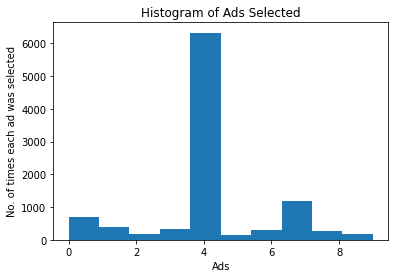

In [5]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selected")
plt.xlabel("Ads")
plt.ylabel("No. of times each ad was selected")

#THOMPSON SAMPLING

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataset=pd.read_csv("https://raw.githubusercontent.com/Anjali8499/Best_Ad_Predictor-UCB-Algo/main/Ads_CTR_Optimisation.csv")

In [8]:
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [9]:
import random
N=10000
d=10
ads_selected=[]
number_of_rewards_1=[0]*d
number_of_rewards_0=[0]*d
total_reward=0

for n in range (0,N):
  ad=0
  max_random=0
  for i in range (0,d):
    random_beta=random.betavariate(number_of_rewards_1[i]+1,number_of_rewards_0[i]+1)

    if random_beta > max_random:
      max_random=random_beta
      ad=i

  ads_selected.append(ad)
  reward=dataset.values[n,ad]
  if reward==1:
    number_of_rewards_1[ad]=number_of_rewards_1[ad]+1
  else:
    number_of_rewards_0[ad]=number_of_rewards_0[ad]+1
  total_reward += reward


Text(0, 0.5, 'No of times the ad was selected')

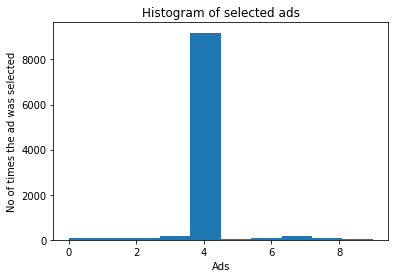

In [10]:
plt.hist(ads_selected)
plt.title("Histogram of selected ads")
plt.xlabel('Ads')
plt.ylabel('No of times the ad was selected')